# TEAM – 3	MOVIE RECOMMENDATION SYSTEM

## Members :

### ABHJIT P A      -    CB.EN.U4CSE21101

### HARIISH G       -    CB.EN.U4CSE21124

### KAMALESH L	-  CB.EN.U4CSE21127

### VISWA A V  	-       CB.EN.U4CSE21168

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# URL OF DATASET

### Movies DataSet (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Reading CSV

In [2]:
movies = pd.read_csv('movies_metadata.csv', engine="python")

In [3]:
ratings = pd.read_csv("ratings.csv")
crew = pd.read_csv("credits.csv")

# Database Info

## movies.csv

movies

In [4]:
movies.shape

(45463, 24)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [6]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


## ratings.csv

In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [8]:
ratings.shape

(26024289, 4)

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


## credits.csv

In [11]:
crew

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [12]:
crew.shape

(45476, 3)

In [13]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [14]:
crew.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


## Data Processing

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lc = LabelEncoder()

# Removing Noise

In [17]:
movies.drop(["belongs_to_collection","homepage","poster_path","imdb_id","production_companies","spoken_languages","tagline"],axis = 1,inplace = True)

# Processing Genre feature

In [18]:
movies.genres.value_counts()
movies["genres2"] = movies["genres"]

In [19]:
for i in range(len(movies["genres2"])):
    if len(movies["genres2"][i]) == 2:
        movies["genres2"][i] = "Drama"
    else :
        x = movies["genres2"][i][:15]
        if "878" in x:
            movies["genres2"][i] = "Science Fiction"
        elif "53" in x:
            movies["genres2"][i] = "Thriller"
        elif "10749" in x:
            movies["genres2"][i] = "Romance"
        elif "12" in x:
            movies["genres2"][i] = "Adventure"
        elif "16" in x:
            movies["genres2"][i] = "Animation"
        elif "36" in x:
            movies["genres2"][i] = "History"
        elif "28" in x:
            movies["genres2"][i] = "Action"
        elif "27" in x:
            movies["genres2"][i] = "Horror"
        elif "10751" in x:
            movies["genres2"][i] = "Family"
        elif "9648" in x:
            movies["genres2"][i] = "Mystery"
        elif "10752" in x:
            movies["genres2"][i] = "War"
        elif "35" in x:
            movies["genres2"][i] = "Comedy"
        elif "99" in x:
            movies["genres2"][i] = "Documentary"
        elif "80" in x:
            movies["genres2"][i] = "Crime"
        elif "10769" in x:
            movies["genres2"][i] = "Foreign"
        elif "10402" in x:
            movies["genres2"][i] = "Music"
        elif "18" in x:
            movies["genres2"][i] = "Drama"
        elif "10770" in x:
            movies["genres2"][i] = "TV Movie"
        elif "14" in x:
            movies["genres2"][i] = "Fantasy"
        elif "37" in x:
            movies["genres2"][i] = "Western"   

In [20]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres2
0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,Animation
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,Adventure
2,False,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy
4,False,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy


In [21]:
movies.genres.value_counts()

genres
[Drama]                                                         5000
[Comedy]                                                        3621
[Documentary]                                                   2723
[]                                                              2442
[Drama, Romance]                                                1301
                                                                ... 
[Comedy, Crime, Mystery, Romance, Thriller]                        1
[Adventure, Animation, Action, Comedy, Family]                     1
[Mystery, Drama, Fantasy, Science Fiction, Thriller, Horror]       1
[Western, Music]                                                   1
[Family, Animation, Romance, Comedy]                               1
Name: count, Length: 4066, dtype: int64

## Processing Production Countries Feature

In [22]:
movies.production_countries.value_counts()

production_countries
[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                          17851
[]                                                                                                                                                                   6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                     2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                             1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                                              1356
                                                                                                                                 

In [23]:
for i in range(len(movies["production_countries"])):
    if movies["production_countries"][i] == "[]":
        movies["production_countries"][i] = "United States of America"
    elif type(movies["production_countries"][i]) == float:
        movies["production_countries"][i] = "United States of America"
    else :
        x = movies["production_countries"][i][:25]
        if "US" in x:
            movies["production_countries"][i] = "United States of America"
        elif "GB" in x:
            movies["production_countries"][i] = "United Kingdom"
        elif "DE" in x:
            movies["production_countries"][i] = "Germany"
        elif "FR" in x:
            movies["production_countries"][i] = "France"
        elif "IT" in x:
            movies["production_countries"][i] = "Italy"
        elif "CN" in x:
            movies["production_countries"][i] = "China"
        elif "AU" in x:
            movies["production_countries"][i] = "Australia"
        elif "ZA" in x:
            movies["production_countries"][i] = "South Africa"
        elif "CA" in x:
            movies["production_countries"][i] = "Canada"
        elif "BE" in x:
            movies["production_countries"][i] = "Belgium"
        elif "IR" in x:
            movies["production_countries"][i] = "Iran"
        elif "NL" in x:
            movies["production_countries"][i] = "Netherlands"
        elif "HK" in x:
            movies["production_countries"][i] = "Hong Kong"
        elif "TN" in x:
            movies["production_countries"][i] = "Tunisia"
        elif "DO" in x:
            movies["production_countries"][i] = "Dominican Republic"
        elif "HR" in x:
            movies["production_countries"][i] = "Croatia"
        elif "AT" in x:
            movies["production_countries"][i] = "Austria"
        elif "IE" in x:
            movies["production_countries"][i] = "Ireland"
        elif "TW" in x:
            movies["production_countries"][i] = "Taiwan"
        elif "NZ" in x:
            movies["production_countries"][i] = "New Zealand"
        elif "MX" in x:
            movies["production_countries"][i] = "Mexico"
        elif "JP" in x:
            movies["production_countries"][i] = "Japan"
        elif "PE" in x:
            movies["production_countries"][i] = "Peru"
        elif "CU" in x:
            movies["production_countries"][i] = "Cuba"
        elif "DK" in x:
            movies["production_countries"][i] = "Denmark"
        elif "FI" in x:
            movies["production_countries"][i] = "Finland"
        elif "MA" in x:
            movies["production_countries"][i] = "Morocco"
        elif "IN" in x:
            movies["production_countries"][i] = "India"
        elif "EG" in x:
            movies["production_countries"][i] = "Egypt"
        elif "LY" in x:
            movies["production_countries"][i] = "Libyan Arab Jamahiriya"
        elif "BF" in x:
            movies["production_countries"][i] = "Burkina Faso"
        elif "TH" in x:
            movies["production_countries"][i] = "Thailand"
        elif "GR" in x:
            movies["production_countries"][i] = "Greece"
        elif "HU" in x:
            movies["production_countries"][i] = "Hungary"
        elif "VN" in x:
            movies["production_countries"][i] = "Vietnam"
        elif "RU" in x:
            movies["production_countries"][i] = "Russia"
        elif "SE" in x:
            movies["production_countries"][i] = "Sweden"
        elif "RS" in x:
            movies["production_countries"][i] = "Serbia"
        elif "CH" in x:
            movies["production_countries"][i] = "Switzerland"
        elif "AE" in x:
            movies["production_countries"][i] = "UAE"
        elif "PL" in x:
            movies["production_countries"][i] = "Poland"
        elif "AR" in x:
            movies["production_countries"][i] = "Argentina"
        else :
            movies["production_countries"][i] = "United Kingdom"       

In [24]:
movies.production_countries.value_counts()

production_countries
United States of America    24710
United Kingdom               5813
France                       2705
Canada                       1498
Japan                        1493
Italy                        1471
Germany                      1418
Russia                        800
India                         783
Australia                     506
Hong Kong                     468
Sweden                        396
Finland                       324
China                         300
Belgium                       299
Denmark                       297
Poland                        245
Mexico                        236
Netherlands                   226
Argentina                     211
Austria                       151
Ireland                       135
Greece                        131
Hungary                       119
Switzerland                    99
New Zealand                    94
Iran                           92
Thailand                       90
Taiwan                     

## Handling Null values

#### Droping records where null values found in ('release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count') features.

#### Replacing null values found in (budget and revenue) with mean of those features.

In [25]:
movies['budget'] = pd.to_numeric(movies['budget'], errors = 'coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')
movies['id'] = pd.to_numeric(movies['id'], errors = 'coerce')
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
movies2 = pd.read_csv("tmdb_5000_movies.csv")
movies2['genres'] = movies2['genres'].apply(convert)
movies['budget'] = movies['budget'].replace(0, np.nan)
movies['budget'].fillna(value = movies['budget'].mean(), inplace = True)

In [26]:
movies['popularity'].fillna(value = movies['popularity'].median(), inplace = True)
movies.dropna(subset = ['release_date', 'runtime', 'status', 'title', 'vote_average', 'vote_count'], inplace = True)
movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['revenue'].fillna(value = movies['revenue'].mean(), inplace = True)

In [27]:
movies2.keywords

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object

In [28]:

def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [29]:
movies2["keywords"] = movies2["keywords"].apply(convert)
movies2["keywords"] = movies2["keywords"].apply(collapse)

## Label Encoding

In [30]:
movies["adultenc"] = lc.fit_transform(movies["adult"])
movies["original_languageenc"] = lc.fit_transform(movies["original_language"])
movies["statusenc"] = lc.fit_transform(movies["status"])
movies["videoenc"] = lc.fit_transform(movies["video"])

# Extracting data from crew

In [31]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return [i['name']]
    return np.nan

def get_star(x):
    for i in x:
        return [i['name']]
    return np.nan

def get_dir_gender(x):
    for i in x:
        if i['job'] == 'Director':
            return i['gender']
    return np.nan 

def get_star_gender(x):
    for i in x:
        return i['gender']
    return np.nan

In [32]:
from ast import literal_eval

crew['director'] = crew['crew'].apply(literal_eval).apply(get_director)
crew['starring'] = crew['cast'].apply(literal_eval).apply(get_star)

## Merging The three CSVs

In [33]:
movies.id.drop_duplicates(keep = 'first', inplace = True)
ratings.rename(columns = {"movieId":"id"},inplace =  True)
ratings2 = ratings.copy()
ratings.drop_duplicates(subset = ["id"],keep = 'first', inplace = True)
crew.id.drop_duplicates(keep = 'first', inplace = True)
movies2.drop(["homepage","production_companies","spoken_languages","tagline"],axis = 1,inplace = True)


In [34]:
keywords = pd.read_csv("keywords.csv")
keywords["keywords"] = keywords["keywords"].apply(convert)
keywords["keywords"] = keywords["keywords"].apply(collapse)

In [35]:
movies = movies.merge(keywords,on = "id")

In [36]:
movies = movies.merge(crew, on = 'id')
usertotal = ratings2.merge(movies, on = "id")
movies = movies.merge(ratings, on = 'id')
movies2 = movies2.merge(ratings, on = 'id')
movies2 = movies2.merge(crew, on = 'id')


In [37]:
movies2.keywords

0       [ocean, drugabuse, exoticisland, eastindiatrad...
1       [dualidentity, amnesia, sandstorm, loveofone's...
2       [marvelcomic, sequel, superhero, basedoncomicb...
3       [witch, magic, broom, schoolofwitchcraft, wiza...
4       [witch, fortuneteller, bondage, exoticisland, ...
                              ...                        
1335                                                   []
1336             [salesclerk, loser, aftercreditsstinger]
1337    [gay, trailerpark, popculture, drugdealer, her...
1338                                                   []
1339             [obsession, camcorder, crush, dreamgirl]
Name: keywords, Length: 1340, dtype: object

In [38]:
movies.drop("userId",axis =1,inplace = True)

In [39]:
from ast import literal_eval

movies['gender_star'] = movies['cast'].apply(literal_eval).apply(get_star_gender)
movies['gender_director'] = movies['crew'].apply(literal_eval).apply(get_dir_gender)
movies['year'] = movies['release_date'].dt.year
movies['month'] = movies['release_date'].dt.month

movies['genres'] = movies['genres'].apply(collapse)
movies2['genres'] = movies['genres'].apply(collapse)
usertotal['genres'] = usertotal['genres'].apply(collapse)


In [40]:
movies.dropna(subset = ["director","starring","gender_star","gender_director"],inplace = True)

In [41]:
movies.shape

(7353, 33)

# VISUALIZATION

### Budget Vs Revenue

Regression Line Equation: Revenue = 2.87 * Budget + 9878466.16


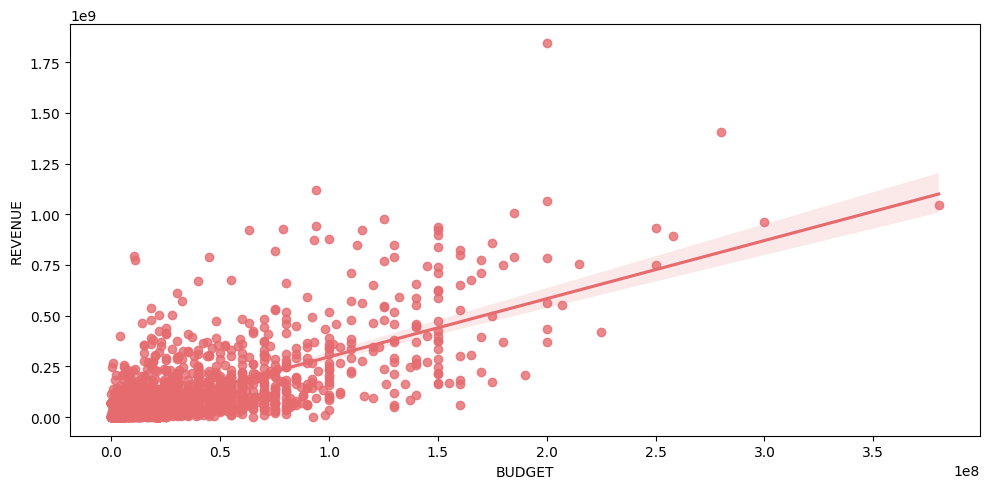

In [42]:
Y = movies.budget.values
X = movies.revenue.values

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.regplot(ax = ax, x = Y, y = X ,color ="#e56b6f")
slope, intercept = np.polyfit(Y, X, 1)
equation = f"Revenue = {slope:.2f} * Budget + {intercept:.2f}"
print("Regression Line Equation:", equation)
plt.xlabel("BUDGET")
plt.ylabel("REVENUE")
plt.tight_layout()

### Budget Vs Popularity

Regression Line Equation: Popularity = 0.0000001 * Budget + 1.71


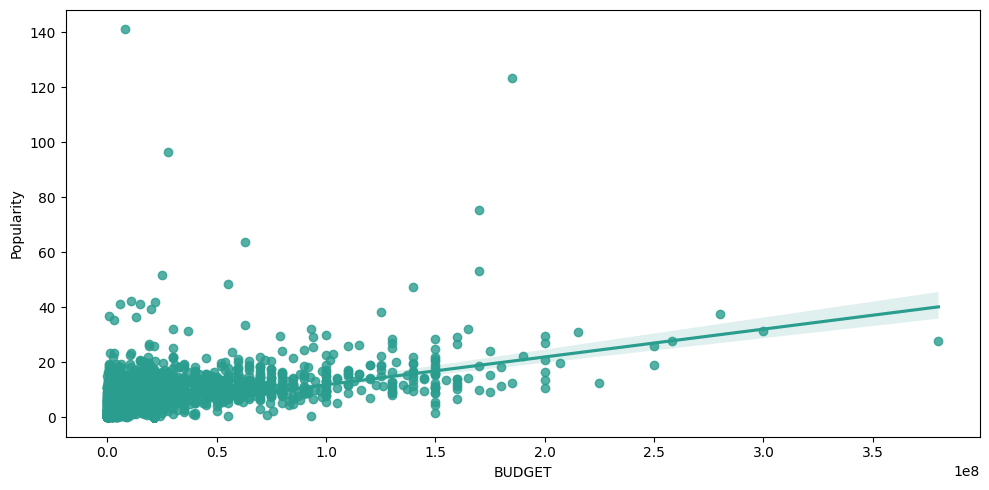

In [43]:
Y = movies.budget.values
X = movies.popularity.values

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.regplot(ax = ax, x = Y, y = X, color  = "#2a9d8f")
slope, intercept = np.polyfit(Y, X, 1)
equation = f"Popularity = {slope:.7f} * Budget + {intercept:.2f}"
print("Regression Line Equation:", equation)
plt.xlabel("BUDGET")
plt.ylabel("Popularity")
plt.tight_layout()

### Budget Vs Vote Average

Regression Line Equation: Vote Average = 0.0000000025 * Budget + 5.83


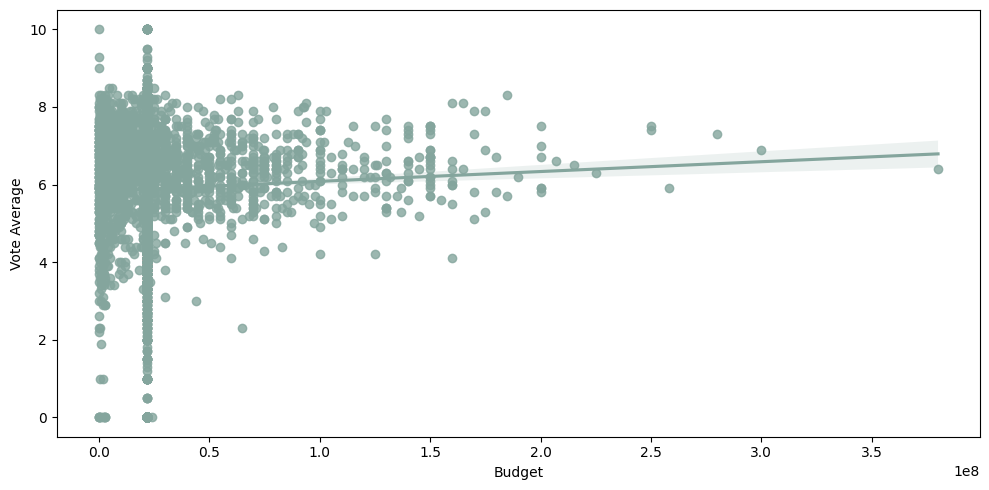

In [44]:
Y = movies.budget.values
X = movies.vote_average.values

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.regplot(ax = ax, x = Y, y = X, color = "#84a59d")
slope, intercept = np.polyfit(Y, X, 1)
equation = f"Vote Average = {slope:.10f} * Budget + {intercept:.2f}"
print("Regression Line Equation:", equation)
plt.xlabel("Budget")
plt.ylabel("Vote Average")
plt.tight_layout()

### Budget Vs Rating

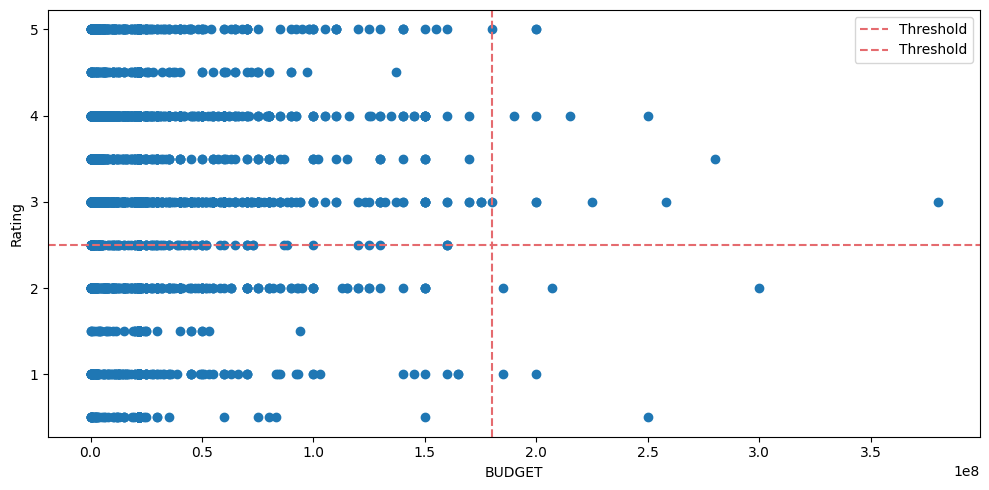

In [45]:
Y = movies.budget.values
X = movies.rating.values

fig, ax = plt.subplots(1,1, figsize=(10,5))
plt.scatter(Y, X)
plt.axhline(y=2.5, linestyle='--', label = 'Threshold', color = "#e56b6f")
plt.axvline(x=180000000, linestyle='--', label = 'Threshold' , color = "#e56b6f")
plt.legend()
plt.xlabel("BUDGET")
plt.ylabel("Rating")
plt.tight_layout()

### Age Rating Vs Rating

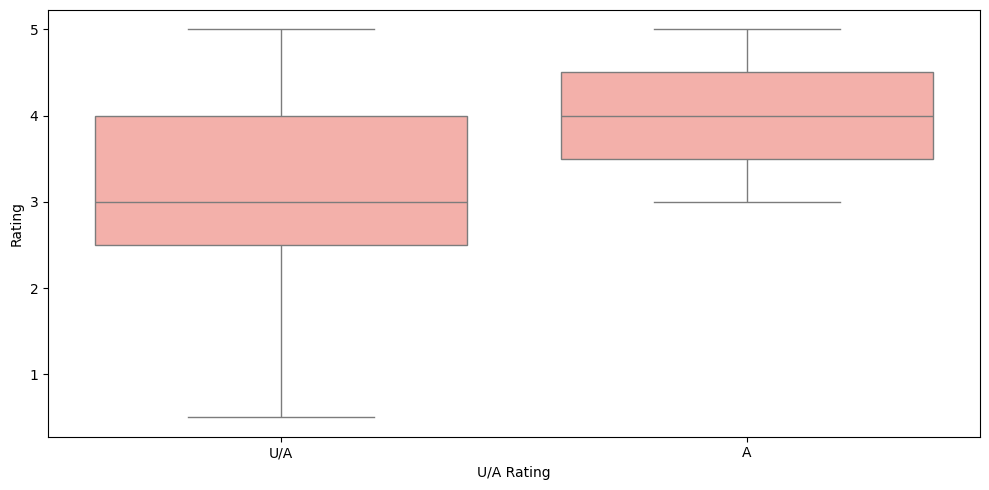

In [46]:
Y = movies.rating.values
X = movies.adultenc.values
color = ["#ffa69e",]
custompalete  = sns.set_palette(sns.color_palette(color))
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(ax = ax, x = X, y = Y , color = custompalete)
plt.xlabel("U/A Rating")
plt.ylabel("Rating")
plt.xticks(range(2),["U/A","A"])
plt.tight_layout()

### Rating Vs Runtime

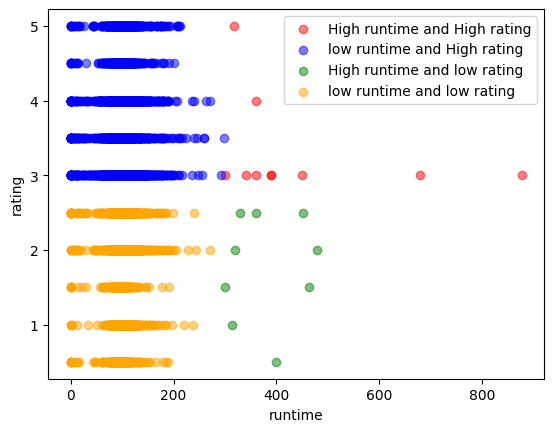

In [47]:
plt.scatter(movies[(movies["runtime"]>=300) & (movies["rating"]>=3)]["runtime"],movies[(movies["runtime"]>=300) & (movies["rating"]>=3)]["rating"],color = "red",label = "High runtime and High rating",alpha = 0.5)
plt.scatter(movies[(movies["runtime"]<300) & (movies["rating"]>=3)]["runtime"],movies[(movies["runtime"]<300) & (movies["rating"]>=3)]["rating"],color = "blue",label = "low runtime and High rating",alpha = 0.5)
plt.scatter(movies[(movies["runtime"]>=300) & (movies["rating"]<3)]["runtime"],movies[(movies["runtime"]>=300) & (movies["rating"]<3)]["rating"],color = "green",label = "High runtime and low rating",alpha = 0.5)
plt.scatter(movies[(movies["runtime"]<300) & (movies["rating"]<3)]["runtime"],movies[(movies["runtime"]<300) & (movies["rating"]<3)]["rating"],color = "orange",label = "low runtime and low rating",alpha = 0.5)

plt.legend()
plt.xlabel("runtime")
plt.ylabel("rating")
plt.show()


## Movie Runtime Over the Years

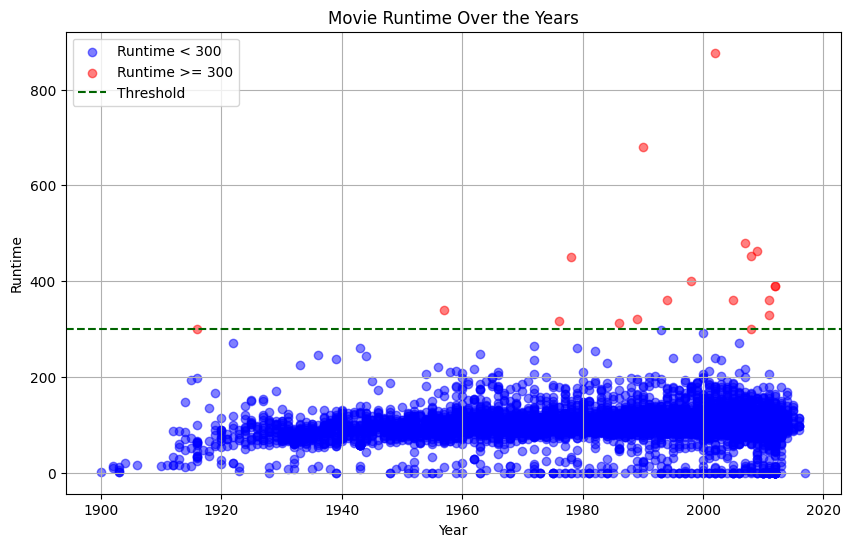

In [48]:
plt.figure(figsize=(10,6))

plt.scatter(movies[movies['runtime'] < 300]['year'], movies[movies['runtime'] < 300]['runtime'], color = 'blue', label = "Runtime < 300", alpha = 0.5)

plt.scatter(movies[movies['runtime']>=300]['year'], movies[movies['runtime'] >=300]['runtime'], color = 'red', label = 'Runtime >= 300', alpha = 0.5)

plt.axhline(y=300,  linestyle='--', label = 'Threshold',color = "#006400")

plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Movie Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()

## Top 10 grossing movies of all time

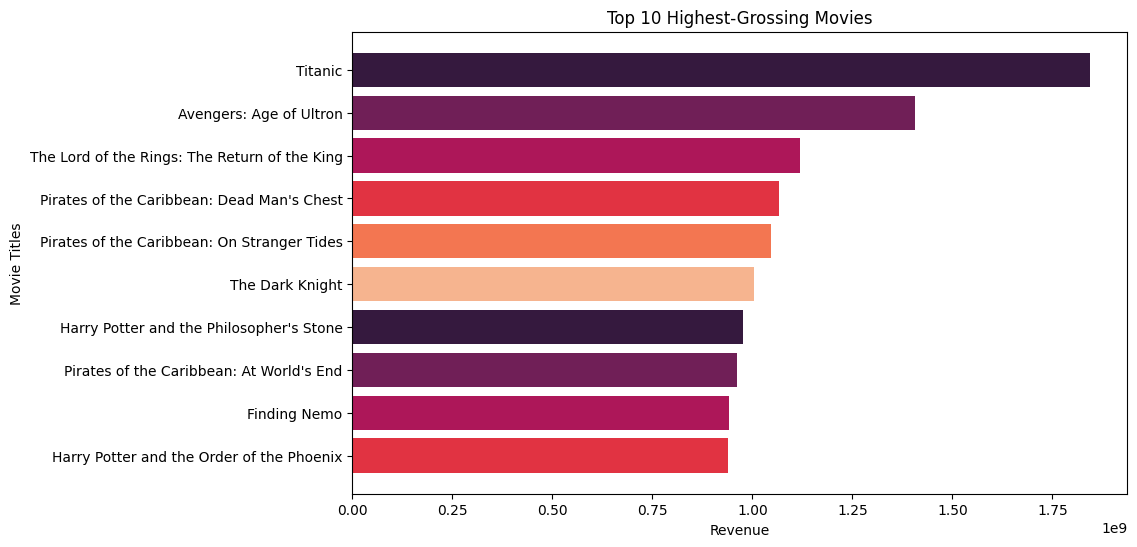

In [49]:
top_10_highest_grossing = movies.sort_values('revenue', ascending = False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_10_highest_grossing['title'], top_10_highest_grossing['revenue'],color = sns.color_palette("rocket"))
plt.xlabel('Revenue')
plt.ylabel('Movie Titles')
plt.title('Top 10 Highest-Grossing Movies')
plt.gca().invert_yaxis()
plt.show()

## Top 10 Genres with most movies

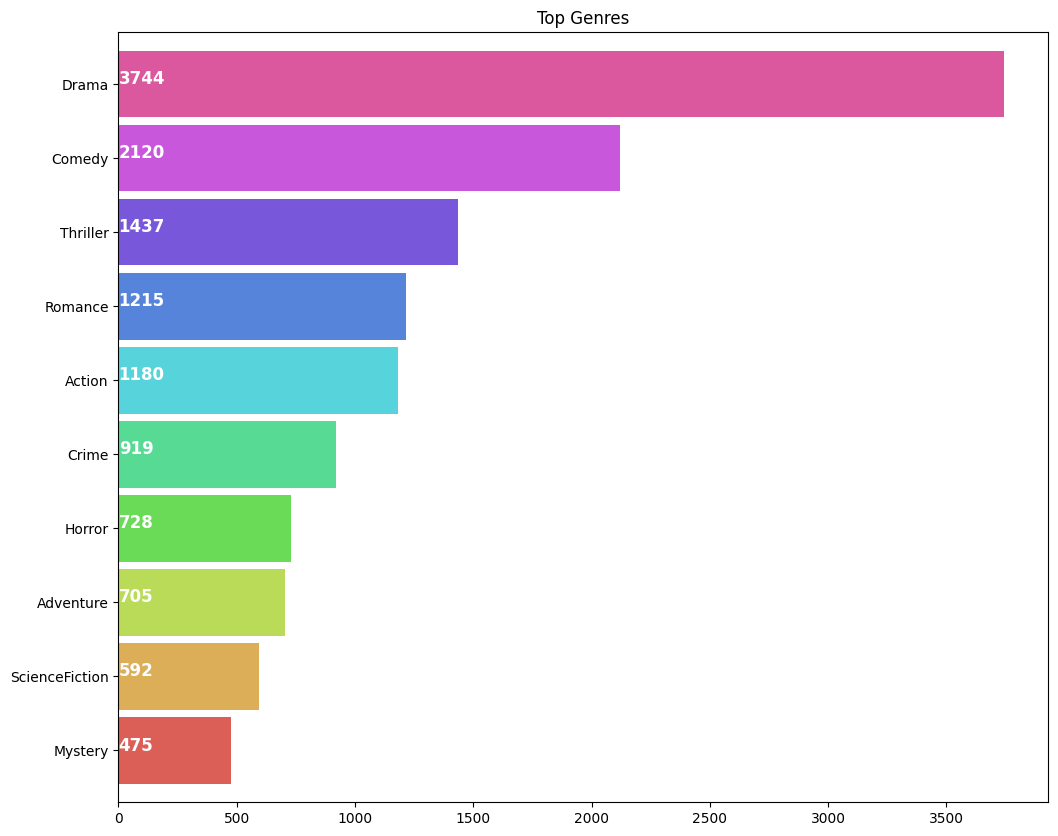

In [50]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

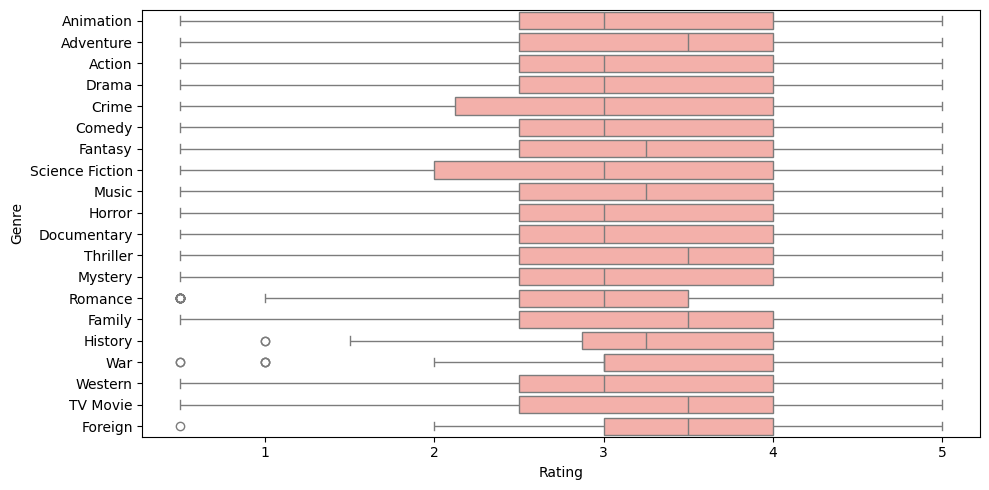

In [51]:
Y = movies.rating.values
X = movies.genres2.values

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(ax = ax, x = Y, y = X)
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()

## Gender Distribution in Movies

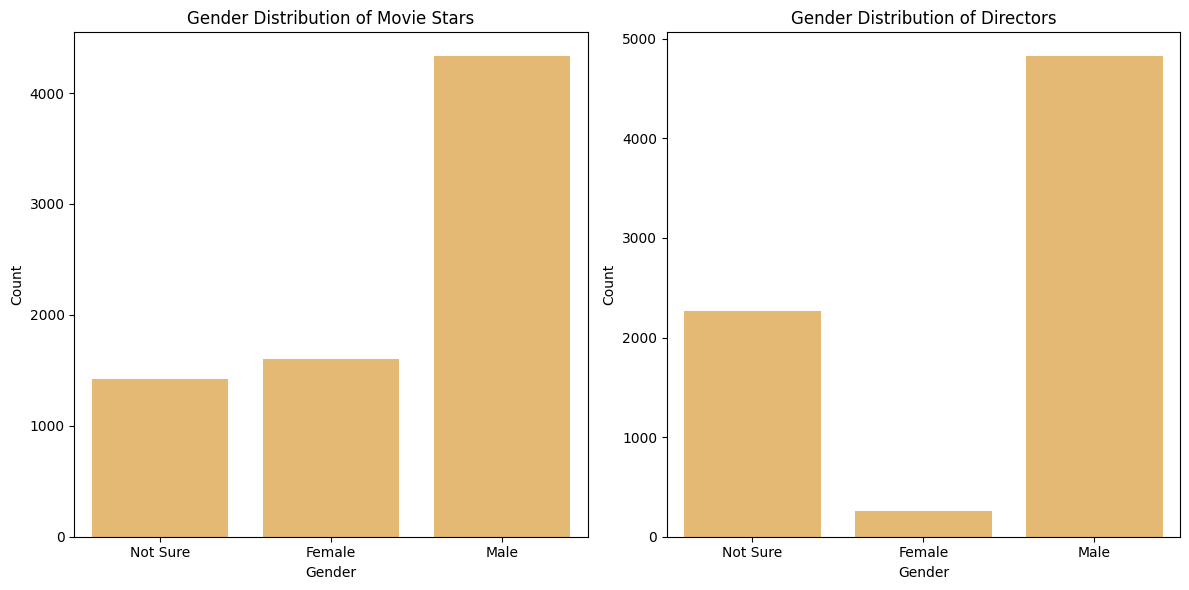

In [52]:
gender_star = movies.gender_star.value_counts()
gender_director = movies.gender_director.value_counts()

order = ['Not Sure', 'Female', 'Male']

fig, axs = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=axs[0], x =gender_star.index, y= gender_star.values, color  = "#f6bd60")
sns.barplot(ax=axs[1], x =gender_director.index, y= gender_director.values, color = "#f6bd60")

axs[0].set_title('Gender Distribution of Movie Stars')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_xticks(range(len(order)))
axs[0].set_xticklabels(order)

axs[1].set_title('Gender Distribution of Directors')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')
axs[1].set_xticks(range(len(order)))
axs[1].set_xticklabels(order)

plt.tight_layout()
plt.show()

## Countries with most productions

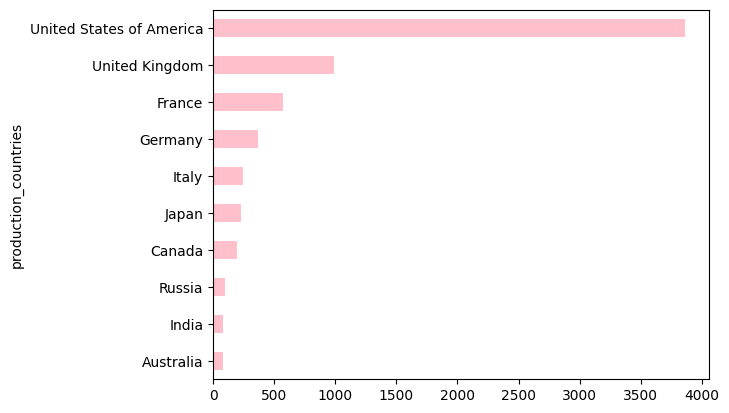

In [53]:
movies['production_countries'].value_counts().head(10).plot(kind='barh',color = "pink")
plt.gca().invert_yaxis()

## Directors with Most Movies

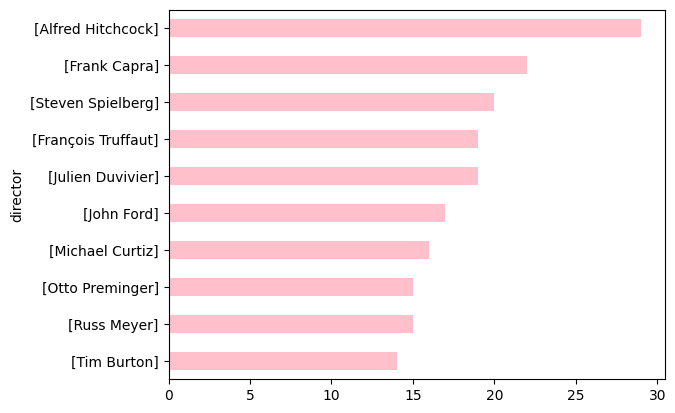

In [54]:
movies.director.value_counts().head(10).plot(kind='barh',color = "pink")
plt.gca().invert_yaxis()

## Actors with most movie appearances

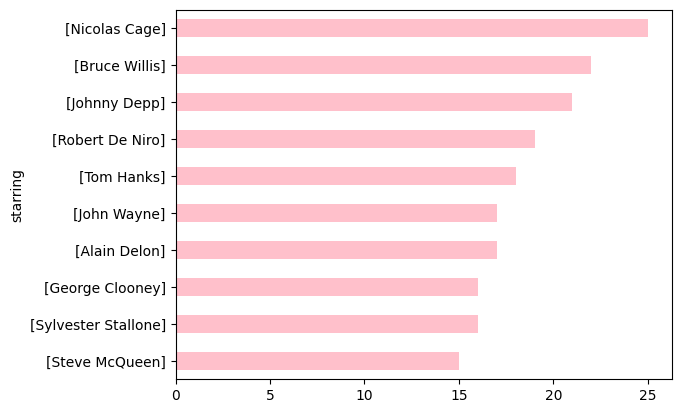

In [55]:
movies.starring.value_counts().head(10).plot(kind='barh',color = "pink")
plt.gca().invert_yaxis()

## Distribution of Movie Releases by Year

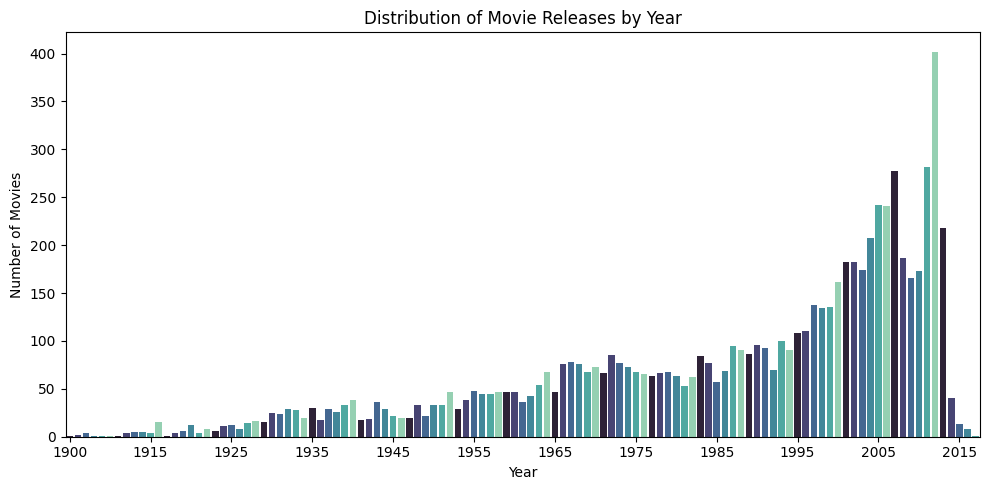

In [56]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.countplot(data=movies, x='year', ax=ax, palette=sns.color_palette("mako"))
ax.set_title('Distribution of Movie Releases by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')

step_size = 10
ax.xaxis.set_major_locator(MultipleLocator(step_size))

plt.tight_layout()
plt.show()

## Distribution of Movie Releases by month

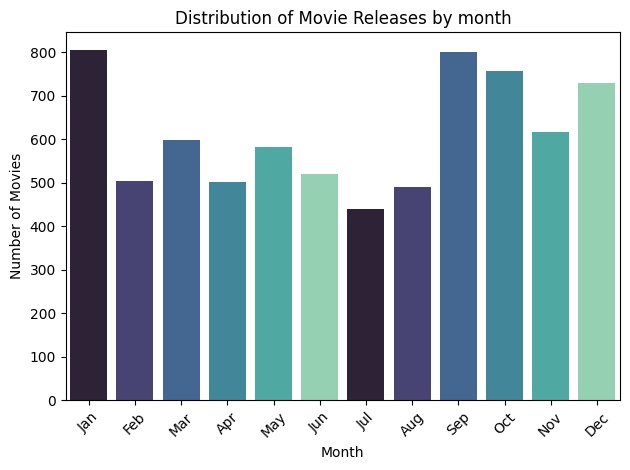

In [57]:
fig, ax = plt.subplots(1,1)

sns.countplot(data=movies, x='month', ax=ax, palette=sns.color_palette("mako"))
ax.set_title('Distribution of Movie Releases by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Movies')
plt.xticks(range(12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation = 45)


plt.tight_layout()
plt.show()

<h1>IMPLEMENTATION</h1>

<h4>MODEL 1 : REVENUE PREDICTOR

In [58]:
us = usertotal.drop(['timestamp','adult','original_title', 'original_language','overview','release_date','status', 'video','videoenc', 'keywords','cast','crew', 'director', 'starring'],axis = 1)
us["genres2"] = lc.fit_transform(us["genres2"])

In [59]:
us.production_countries = lc.fit_transform(us.production_countries)

In [60]:
usx = us.drop(["userId","id","genres"],axis = 1)
uscor = us.drop(["userId","id","genres","title"],axis = 1)
usy = us.revenue

<Axes: >

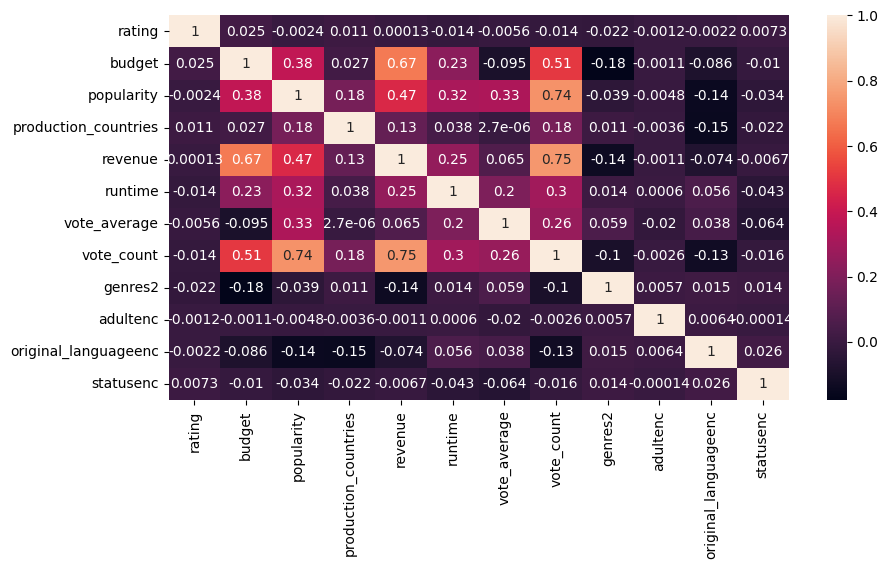

In [61]:
data = uscor.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data,annot =True)

In [62]:
a = list(data["revenue"].sort_values().tail(6).index)
a.pop()

'revenue'

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
lrev = LinearRegression()

In [65]:
from sklearn.model_selection import train_test_split
xt,xT,yt,yT = train_test_split(usx[a],usy,test_size=0.3,random_state=0)

In [66]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),  
   ('regressor', lrev) ])


In [67]:
pipeline.fit(xt,yt)
yrat = pipeline.predict(xT)

In [68]:
from sklearn.metrics import auc, mean_squared_error,r2_score
rmse = mean_squared_error(yrat,yT)
print(rmse)
print(r2_score(yrat,yT))


8350168324922763.0
0.5525904700393582


In [69]:
coeffs = lrev.coef_
inter = lrev.intercept_
print("REGRESSION EQUATION :")
for i in range(len(coeffs)):
    print("(",coeffs[i],")","X"+ str(i+1) , "+",end =" ")

print("(",inter,")")
    
    

REGRESSION EQUATION :
( 4281536.986866418 ) X1 + ( 3962876.4165464044 ) X2 + ( -32825027.65276578 ) X3 + ( 63808327.30755873 ) X4 + ( 112602516.94224888 ) X5 + ( 106489146.76698512 )


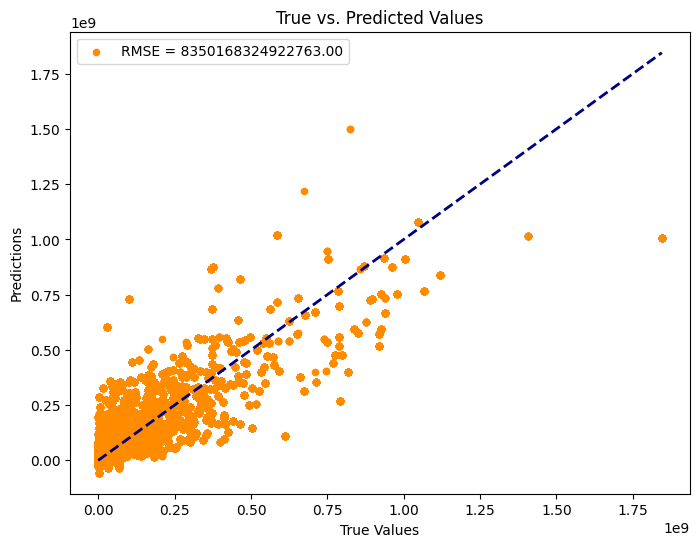

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(yT, yrat, color='darkorange', s=20, label=f'RMSE = {rmse:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.legend(loc='upper left')
plt.plot([min(yT), max(yT)], [min(yT), max(yT)], color='navy', lw=2, linestyle='--')
plt.show()

<h4>MODEL 2 : DEMOGRAPHIC FILTERING & CONTENT BASED FILTERING


linear_kernel, Tf-Idf Vectorizer


In [71]:
c = movies['vote_average'].mean()
print (c)   

5.890194478444172


In [72]:
m = movies['vote_count'].quantile(0.95)

In [73]:
qualified_movies = movies.copy().loc[movies['vote_count']>=m]

In [74]:
def weighted_rating(x):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m) *r) + (m/(v+m) *c)

In [75]:
qualified_movies['score'] = qualified_movies.apply(weighted_rating,axis=1)

In [76]:

qualified_movies = qualified_movies.sort_values('score', ascending=False)


qualified_movies[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
88,The Shawshank Redemption,8358.0,8.5,8.153398
3144,The Dark Knight,12269.0,8.3,8.072341
210,The Godfather,6024.0,8.5,8.042641
839,Fight Club,9678.0,8.3,8.018511
80,Pulp Fiction,8670.0,8.3,7.989995
3643,Inception,14075.0,8.1,7.915790
97,Forrest Gump,8147.0,8.2,7.886374
4873,Interstellar,11187.0,8.1,7.873117
1837,The Lord of the Rings: The Return of the King,8226.0,8.1,7.802446
321,The Empire Strikes Back,5998.0,8.2,7.793769


In [77]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'].fillna(""))
#Compute cosine similarity using tfidf_matrix
cosine_sim = linear_kernel(tfidf_matrix , tfidf_matrix)

In [78]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [79]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices] + "   " + movies['genres2'].iloc[movie_indices]

In [80]:
get_recommendations('The Dark Knight')

5923            Woman in a Dressing Gown   Romance
6255    In the Dust of the Stars   Science Fiction
4198                                Chains   Drama
5540                 The Ghost of Yotsuya   Horror
4639                The Stranger Within   Thriller
5122                       Intersections   Romance
4622                     Farmageddon   Documentary
6194                     Heart of Stone   Thriller
2508                            Bordertown   Crime
5240                    Food Stamped   Documentary
dtype: object

<h4>MODEL 3 : CONTENT BASED FILTER - KNN/COSINE SIMILARITY</h4>

Count Vectorizer, cosine_similarity

In [81]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'genres2', 'adultenc',
       'original_languageenc', 'statusenc', 'videoenc', 'keywords', 'cast',
       'crew', 'director', 'starring', 'rating', 'timestamp', 'gender_star',
       'gender_director', 'year', 'month'],
      dtype='object')

In [82]:
moviesml = movies.drop(columns=["adult","budget",'original_language','original_title','popularity', 'production_countries','release_date', 'revenue', 'runtime', 'status','video','vote_average', 'vote_count', 'adultenc', 'original_languageenc','statusenc', 'videoenc','timestamp','gender_star', 'gender_director','year', 'month'])

In [83]:
movies2.shape

(1340, 23)

In [84]:
moviesml2 = movies2.drop(columns= ['budget','original_language','original_title','popularity', 'production_countries','release_date', 'revenue', 'runtime', 'status','vote_average', 'vote_count',"userId",'timestamp'] )

In [85]:
df  = pd.concat([moviesml,moviesml2])

In [86]:
df.reset_index(inplace=True)

In [87]:
df[df["genres"].isnull()]["genres"] = ["Drama"]
df[df["overview"].isnull()]["overview"] = df[df["overview"].isnull()]["genres"]


In [88]:
df['overview'] = df['overview'].apply(lambda x:str(x).split())


In [89]:
xl = df[df["starring"].isnull()].index
xl2 = df[df["director"].isnull()].index


In [90]:
df.drop(xl,axis = 0,inplace=True)
df.drop(xl2,axis = 0,inplace=True)

In [91]:
df['tags'] = df["overview"] + df['genres'] + df["keywords"] + df["director"] + df["starring"]
new = df.drop(columns=['overview','genres','cast','crew'])
new.dropna(inplace=True)


In [92]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [94]:
vector = cv.fit_transform(new['tags']).toarray()

In [95]:
vector.shape

(7353, 5000)

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [97]:
def recommend(movie,num=5):
    index = new[new['title'].str.contains(movie)].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    li = []
    li.append((str(list(movies[movies["title"].str.contains(movie)]["title"])[0]),str(list(movies[movies["title"].str.contains(movie)]["rating"])[0]),str(list(movies[movies["title"].str.contains(movie)]["genres"].values)[0])))
    for i in distances[1:num+1]:
        li.append((str(new.iloc[i[0]].title),str(new.iloc[i[0]].rating),str(list(movies[movies["title"] == new.iloc[i[0]].title]["genres"].values)[0])))
    return pd.DataFrame(li, columns=["Title","Rating","Genres"])


<Axes: >

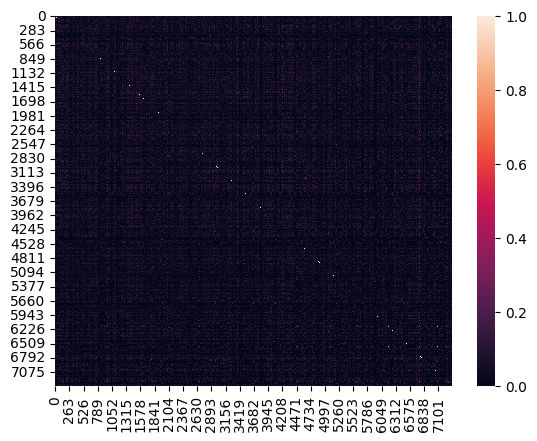

In [98]:
sns.heatmap(similarity)

In [99]:
li = recommend("Jumanji",10)
li

,Title,Rating,Genres
0,Jumanji,4.0,"['Adventure', 'Fantasy', 'Family']"
1,Nirvana,3.5,"['Thriller', 'Fantasy', 'ScienceFiction']"
2,The Wind in the Willows,4.0,"['Family', 'Animation', 'Adventure', 'Comedy']"
3,The Anniversary Party,4.0,"['Comedy', 'Drama']"
4,"Elmer, The Great",5.0,['Comedy']
5,Hook,2.5,"['Adventure', 'Fantasy', 'Comedy', 'Family']"
6,Queen to Play,3.0,"['Comedy', 'Drama']"
7,Masques,3.0,"['Crime', 'Thriller', 'Foreign', 'Comedy']"
8,eXistenZ,4.0,"['Action', 'Thriller', 'ScienceFiction', 'Horr..."
9,Spirited Away,2.0,"['Fantasy', 'Adventure', 'Animation', 'Family']"


total recommendations = 10<br>
relevant recommendations = 4<br>
precision1 = 4/10

In [100]:
precision=[]
precision.append(4/10)

In [101]:
li = recommend("Money",10)
li

,Title,Rating,Genres
0,Milk Money,3.5,"['Comedy', 'Romance']"
1,How Much Do You Love Me?,2.5,"['Comedy', 'Romance']"
2,Suez,3.0,"['Drama', 'History', 'Romance']"
3,Sensation,1.0,"['Drama', 'Comedy', 'Romance', 'Foreign']"
4,Cinderella Liberty,3.0,"['Drama', 'Romance']"
5,Irma la Douce,3.0,"['Comedy', 'Romance']"
6,Pammal K. Sambandam,2.0,"['Comedy', 'Drama']"
7,Moonstruck,3.0,"['Comedy', 'Drama', 'Romance']"
8,The Crush,0.5,"['Romance', 'Drama']"
9,Mifune,4.0,"['Romance', 'Comedy', 'Drama']"


total recommendations = 10<br>
relevant recommendations = 10<br>
precision2 = 10/10

In [102]:
precision.append(10/10)

In [103]:
li = recommend("When Harry Met Sally",10)
li

,Title,Rating,Genres
0,When Harry Met Sally...,2.0,"['Comedy', 'Romance', 'Drama']"
1,Miracle in the Rain,2.5,"['Drama', 'Romance']"
2,La montaña rusa,2.5,"['Comedy', 'Romance']"
3,Coming Home,4.5,"['Drama', 'Romance']"
4,Dear Heart,2.5,"['Comedy', 'Family']"
5,Köyden İndim Şehire,3.5,"['Comedy', 'Drama']"
6,The Lifeguard,4.0,"['Drama', 'Comedy', 'Romance']"
7,Cloud 9,2.0,"['Drama', 'Romance']"
8,Anyone Can Play,4.0,"['Comedy', 'Drama', 'Romance']"
9,The Docks of New York,4.0,"['Drama', 'Romance']"


total recommendations = 10<br>
relevant recommendations = 10<br>
precision3 = 10/10

In [104]:
precision.append(10/10)

In [105]:
li = recommend("The Dark Knight",10)
li

,Title,Rating,Genres
0,The Dark Knight,1.0,"['Drama', 'Action', 'Crime', 'Thriller']"
1,Batman Begins,4.0,"['Action', 'Crime', 'Drama']"
2,Batman Returns,3.0,"['Action', 'Fantasy']"
3,Batman & Robin,4.0,"['Action', 'Crime', 'Fantasy']"
4,Batman Forever,2.0,"['Action', 'Crime', 'Fantasy']"
5,Batman,1.0,"['Fantasy', 'Action']"
6,The Public Eye,3.5,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr..."
7,Pimp Bullies,4.0,"['Action', 'Thriller', 'Crime']"
8,The Testimony,3.0,"['Crime', 'Drama']"
9,Violent City,2.5,"['Action', 'Crime', 'Thriller']"


total recommendations = 10<br>
relevant recommendations = 10<br>
precision4 = 10/10

In [106]:
precision.append(10/10)

In [107]:
li = recommend("Terminator",10)
li

,Title,Rating,Genres
0,Terminator 2: Judgment Day,2.0,"['Action', 'Thriller', 'ScienceFiction']"
1,The Terminator,3.0,"['Action', 'Thriller', 'ScienceFiction']"
2,Terminator Salvation,5.0,"['Action', 'ScienceFiction', 'Thriller']"
3,Terminator 3: Rise of the Machines,4.0,"['Action', 'Thriller', 'ScienceFiction']"
4,Zardoz,4.0,"['Fantasy', 'Action', 'Thriller', 'ScienceFict..."
5,Equilibrium,4.0,"['Action', 'ScienceFiction', 'Thriller']"
6,The Terminators,4.5,"['Action', 'Horror', 'ScienceFiction']"
7,Minority Report,3.5,"['Action', 'Thriller', 'ScienceFiction', 'Myst..."
8,RoboCop 3,2.0,"['Action', 'Adventure', 'Crime', 'ScienceFicti..."
9,The Time Machine,4.0,"['Thriller', 'Adventure', 'Fantasy', 'ScienceF..."


total recommendations = 10<br>
relevant recommendations = 10<br>
precision5 = 10/10

In [108]:
precision.append(10/10)

In [109]:
li = recommend("Men ",10)
li

,Title,Rating,Genres
0,Men in Black,4.0,"['Action', 'Adventure', 'Comedy', 'ScienceFict..."
1,Men in Black II,5.0,"['Action', 'Adventure', 'Comedy', 'ScienceFict..."
2,The Brother from Another Planet,3.5,"['Comedy', 'Drama', 'ScienceFiction']"
3,Men in White,4.0,"['ScienceFiction', 'Comedy']"
4,This Island Earth,2.0,"['Mystery', 'Adventure', 'ScienceFiction', 'Ho..."
5,Looking for Langston,3.5,['Drama']
6,Codependent Lesbian Space Alien Seeks Same,0.5,"['Comedy', 'Romance', 'ScienceFiction']"
7,Valley of the Dragons,0.5,['ScienceFiction']
8,The Last Man,3.5,['Comedy']
9,The Wild Blue Yonder,4.0,"['Drama', 'ScienceFiction']"


total recommendations = 10<br>
relevant recommendations = 7<br>
precision6 = 7/10

In [110]:
precision.append(7/10)

In [111]:
li = recommend("Toy Story",10)
li

,Title,Rating,Genres
0,Toy Story,3.0,"['Animation', 'Comedy', 'Family']"
1,The 40 Year Old Virgin,3.0,"['Comedy', 'Romance']"
2,Radio Days,4.0,"['Comedy', 'Drama']"
3,Wabash Avenue,4.0,['Music']
4,Lonesome Cowboys,1.0,['Western']
5,Annie Hall,2.0,"['Comedy', 'Drama', 'Romance']"
6,Larry Crowne,3.0,"['Comedy', 'Romance', 'Drama']"
7,The Front,2.0,"['Comedy', 'Drama']"
8,Hannah and Her Sisters,3.0,"['Comedy', 'Drama']"
9,Ruudi,2.5,"['Family', 'Comedy', 'Fantasy']"


total recommendations = 10<br>
relevant recommendations = 5<br>
precision7 = 5/10

In [112]:
precision.append(5/10)

In [113]:
li = recommend("Bad Boys",10)
li

,Title,Rating,Genres
0,Bad Boys II,2.5,"['Adventure', 'Action', 'Comedy', 'Thriller', ..."
1,Scarface,5.0,"['Action', 'Crime', 'Drama', 'Thriller']"
2,Pain & Gain,4.5,"['Thriller', 'Crime', 'Action']"
3,2 Fast 2 Furious,3.0,"['Action', 'Crime', 'Thriller']"
4,Tony Rome,3.0,"['Crime', 'Mystery', 'Thriller']"
5,The Marksman,4.0,"['Action', 'Adventure', 'Thriller']"
6,Cutaway,3.0,"['Action', 'Thriller']"
7,Get Shorty,4.0,"['Comedy', 'Thriller', 'Crime']"
8,Miami Vice,4.0,"['Action', 'Adventure', 'Crime', 'Thriller']"
9,My Life in Orange,4.5,['Comedy']


total recommendations = 10<br>
relevant recommendations = 8<br>
precision8 = 8/10

In [114]:
precision.append(8/10)

In [115]:
li = recommend("Dragon",10)
li

,Title,Rating,Genres
0,DragonHeart,4.0,['Fantasy']
1,Prince Valiant,0.5,"['Adventure', 'Fantasy']"
2,Dragonslayer,5.0,['Fantasy']
3,"The Nibelungs, Tale 1: Siegfried",1.5,"['Drama', 'Adventure', 'Fantasy']"
4,Harry Potter and the Prisoner of Azkaban,3.0,"['Adventure', 'Fantasy', 'Family']"
5,Batman Forever,2.0,"['Action', 'Crime', 'Fantasy']"
6,The Cave of the Golden Rose,4.5,"['Adventure', 'Family', 'Fantasy', 'Romance']"
7,Prince Valiant,1.0,"['Adventure', 'Fantasy']"
8,A Night at the Movies: The Horrors of Stephen ...,2.0,"['Documentary', 'TVMovie']"
9,Wizards of the Lost Kingdom II,3.0,"['Action', 'Fantasy']"


total recommendations = 10<br>
relevant recommendations = 8<br>
precision8 = 8/10

In [116]:
precision.append(8/10)

In [117]:
li = recommend("The Amazing Spider-Man",10)
li

,Title,Rating,Genres
0,The Amazing Spider-Man,4.0,"['Action', 'Adventure', 'Fantasy']"
1,Spider-Man 3,3.0,"['Fantasy', 'Action', 'Adventure']"
2,The Trials of Oscar Wilde,3.0,"['History', 'Drama']"
3,Next of Kin,3.0,"['Drama', 'Comedy']"
4,The Fjällbacka Murders: Friends for Life,3.0,"['Crime', 'Mystery']"
5,The Prisoner of Zenda,3.0,"['Action', 'Adventure', 'Comedy']"
6,Hook,2.5,"['Adventure', 'Fantasy', 'Comedy', 'Family']"
7,Spider-Man 2,3.0,"['Action', 'Adventure', 'Fantasy']"
8,Twilight of the Ice Nymphs,1.5,"['Fantasy', 'Mystery', 'Romance']"
9,The Lost Room,4.0,"['Action', 'Fantasy', 'Mystery']"


total recommendations = 10<br>
relevant recommendations = 5<br>
precision8 = 5/10

In [118]:
precision.append(5/10)

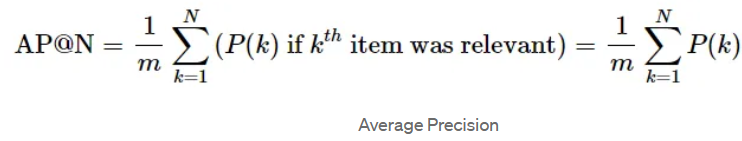

<h3>Therefore the Average Precision of the model is

In [119]:
Average_precision = sum(precision)/10
Average_precision

0.77

In [120]:
tit = input("Enter Movie that you like :")
li = recommend(tit)

In [121]:
li

,Title,Rating,Genres
0,Batman Forever,2.0,"['Action', 'Crime', 'Fantasy']"
1,Batman & Robin,4.0,"['Action', 'Crime', 'Fantasy']"
2,The Dark Knight,1.0,"['Drama', 'Action', 'Crime', 'Thriller']"
3,Batman Begins,4.0,"['Action', 'Crime', 'Drama']"
4,Batman,1.0,"['Fantasy', 'Action']"
5,Prep & Landing,1.5,"['Animation', 'Fantasy', 'Family']"


In [122]:
def to_str(x):
    x = x[0]
    return x

new["director"] = new["director"].apply(to_str)

In [123]:
import pickle
pickle.dump(new.to_dict(),open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df.to_dict(),open("df.pkl","wb"))

In [124]:
new.head()

,index,id,title,genres2,keywords,director,starring,rating,tags
0,0,862,Toy Story,Animation,"[jealousy, toy, boy, friendship, friends, riva...",John Lasseter,[Tom Hanks],3.0,"Led by Woody, Andy's toys live happily in his ..."
1,1,8844,Jumanji,Adventure,"[boardgame, disappearance, basedonchildren'sbo...",Joe Johnston,[Robin Williams],4.0,When siblings Judy and Peter discover an encha...
2,2,949,Heat,Action,"[robbery, detective, bank, obsession, chase, s...",Michael Mann,[Al Pacino],4.0,"Obsessive master thief, Neil McCauley leads a ..."
3,3,710,GoldenEye,Adventure,"[cuba, falselyaccused, secretidentity, compute...",Martin Campbell,[Pierce Brosnan],3.0,James Bond must unmask the mysterious head of ...
4,4,1408,Cutthroat Island,Action,"[exoticisland, treasure, map, ship, scalp, pir...",Renny Harlin,[Geena Davis],5.0,"Morgan Adams and her slave, William Shaw, are ..."


<h4> MODEL 4 : COLLABORATIVE FILTERING

SVD, Kfold

In [125]:

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

ratings = pd.read_csv("ratings_small.csv")
# Load your ratings data


In [126]:

# Create a user-movie rating matrix
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Perform Truncated SVD (equivalent to SVD in surprise)
n_components = 100  # You can choose the number of latent factors
svd = TruncatedSVD(n_components=n_components)
svd.fit(user_movie_matrix)

# Calculate RMSE and MAE using cross-validation (KFold)
kf = KFold(n_splits=3, shuffle=True, random_state=0)
rmse_scores = []
mae_scores = []

for train_index, test_index in kf.split(user_movie_matrix):
    train_data = user_movie_matrix.iloc[train_index]
    test_data = user_movie_matrix.iloc[test_index]
   
    train_reconstructed = pd.DataFrame(svd.inverse_transform(svd.transform(train_data)), columns=train_data.columns)
    test_reconstructed = pd.DataFrame(svd.inverse_transform(svd.transform(test_data)), columns=test_data.columns)
    
    train_reconstructed.fillna(0, inplace=True)
    test_reconstructed.fillna(0, inplace=True)
   
    rmse = np.sqrt(mean_squared_error(test_data.values[test_data.values != 0], test_reconstructed.values[test_data.values != 0]))
    mae = mean_absolute_error(test_data.values[test_data.values != 0], test_reconstructed.values[test_data.values != 0])
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)

print("RMSE scores:", rmse_scores)
print("MAE scores:", mae_scores)


RMSE scores: [1.5964799621874193, 1.6723943958972276, 1.8034966808886557]
MAE scores: [1.0972196321260186, 1.2047244041765857, 1.3277276869221857]


In [127]:

# Fit the model to the entire dataset
svd.fit(user_movie_matrix)


TruncatedSVD(n_components=100)

In [128]:

# Make predictions for a specific user and movie
user_id = 4
movie_id = 302
predicted_rating = svd.inverse_transform(svd.transform(user_movie_matrix.loc[user_id:user_id, :]))[0, movie_id]

print(f"Predicted rating for user {user_id}, movie {movie_id}: {predicted_rating:f}")


Predicted rating for user 4, movie 302: 0.677569


<h4>MODEL 5 : ENSEMBLE MODEL WITH KNNs

Nan - Euclidean Distance, Cityblock distance, Cosine Distance, Minkowski with P =10, Counter for ensembling


In [129]:
from sklearn.neighbors import NearestNeighbors

In [130]:
city = NearestNeighbors(metric="cityblock",p=10,algorithm='brute')
city.fit(ratings.values)


NearestNeighbors(algorithm='brute', metric='cityblock', p=10)

In [131]:
haver = NearestNeighbors(metric="cosine",p=10,algorithm='brute')
haver.fit(ratings.values)


NearestNeighbors(algorithm='brute', metric='cosine', p=10)

In [132]:
naneuc = NearestNeighbors(metric="nan_euclidean",p=10,algorithm='brute')
naneuc.fit(ratings.values)


NearestNeighbors(algorithm='brute', metric='nan_euclidean', p=10)

In [133]:

knn = NearestNeighbors(metric="minkowski",p=10,algorithm='brute')
knn.fit(ratings.values)


NearestNeighbors(algorithm='brute', p=10)

In [134]:
distances, indices = knn.kneighbors(ratings.values, n_neighbors=5)

In [135]:
distancescity, indicescity = city.kneighbors(ratings.values, n_neighbors=5)

In [136]:
distanceshaver, indiceshaver = haver.kneighbors(ratings.values, n_neighbors=5)

In [137]:
distancesnaneuc, indicesnaneuc = naneuc.kneighbors(ratings.values, n_neighbors=5) 

In [ ]:
# get the index for 'movie_0'
to_find = "Ocean's Eleven"
to_find = new[new["title"].str.contains(to_find)]["id"].values[0]
index_for_movie = df.index.tolist().index(to_find)


In [ ]:

# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distances[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print("using euclidean")
print('The Nearest Movies to ',to_find,' :', new[new["id"] == to_find]["title"].values[0])

for i in sim_movies:
    try:
        print(new[new["id"] == i]["title"].values[0])

    except:
        pass

using euclidean
The Nearest Movies to  299  : Ocean's Eleven
Rio Bravo
Swimming Pool
Desert Hearts


In [ ]:

# find the indices for the similar movies
sim_movies = indiceshaver[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distanceshaver[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print("using cosine")
print('The Nearest Movies to ',to_find,' :', new[new["id"] == to_find]["title"].values[0])

for i in sim_movies:
    try:
        print(new[new["id"] == i]["title"].values[0])

    except:
        pass

using cosine
The Nearest Movies to  299  : Ocean's Eleven
Rosemary's Baby


In [ ]:

# find the indices for the similar movies
sim_movies = indicescity[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distancescity[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print("using cityblock")
print('The Nearest Movies to ',to_find,' :', new[new["id"] == to_find]["title"].values[0])

for i in sim_movies:
    try:
        print(new[new["id"] == i]["title"].values[0])

    except:
        pass

using cityblock
The Nearest Movies to  299  : Ocean's Eleven
Rio Bravo
Swimming Pool
The Apartment


In [ ]:

# find the indices for the similar movies
sim_movies = indicesnaneuc[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distancesnaneuc[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print("using nan euclidean")
print('The Nearest Movies to ',to_find,' :', new[new["id"] == to_find]["title"].values[0])

for i in sim_movies:
    try:
        print(new[new["id"] == i]["title"].values[0])

    except:
        pass

using nan euclidean
The Nearest Movies to  299  : Ocean's Eleven
Rio Bravo
Swimming Pool
Desert Hearts


In [ ]:
indices

array([[     0,      1,      2,      3,      4],
       [     1,      2,      3,      4,      5],
       [     2,      1,      3,      4,      5],
       ...,
       [100001,  99961, 100002,  40412,  51628],
       [100002,  40412, 100001,  99961,  51628],
       [100003,  99962,  94182,  94357,  94358]], dtype=int64)

In [ ]:
from collections import Counter

In [ ]:
a  = indicesnaneuc[index_for_movie].tolist()
b = indicescity[index_for_movie].tolist()
c  = indiceshaver[index_for_movie].tolist()
d  =indices[index_for_movie].tolist()

a.remove(index_for_movie)
b.remove(index_for_movie)
c.remove(index_for_movie)
d.remove(index_for_movie)

In [ ]:
a

[301, 302, 305, 294]

In [ ]:
combined_recommendations = Counter(a + b + c + d )

top_recommendations = combined_recommendations.most_common(10)



In [ ]:
for i,j in enumerate(top_recommendations):
    try:
        print(new[new["id"] == i]["title"].values[0])

    except:
        pass

Ariel
Shadows in Paradise
Four Rooms
Judgment Night


<h4>MODEL 6: KMEANS CLUSTERING


PCA, Standard Scaler, Tf-Idf Vectorizer, gap_statistic _ OptimalK


In [ ]:
new.head()

,index,id,title,genres2,keywords,director,starring,rating,tags
0,0,862,Toy Story,Animation,"[jealousy, toy, boy, friendship, friends, riva...",John Lasseter,[Tom Hanks],3.0,"Led by Woody, Andy's toys live happily in his ..."
1,1,8844,Jumanji,Adventure,"[boardgame, disappearance, basedonchildren'sbo...",Joe Johnston,[Robin Williams],4.0,When siblings Judy and Peter discover an encha...
2,2,949,Heat,Action,"[robbery, detective, bank, obsession, chase, s...",Michael Mann,[Al Pacino],4.0,"Obsessive master thief, Neil McCauley leads a ..."
3,3,710,GoldenEye,Adventure,"[cuba, falselyaccused, secretidentity, compute...",Martin Campbell,[Pierce Brosnan],3.0,James Bond must unmask the mysterious head of ...
4,4,1408,Cutthroat Island,Action,"[exoticisland, treasure, map, ship, scalp, pir...",Renny Harlin,[Geena Davis],5.0,"Morgan Adams and her slave, William Shaw, are ..."


In [ ]:
description_df = pd.DataFrame(vector, columns=cv.get_feature_names_out())

In [ ]:
features = pd.concat([new["title"], new["id"],description_df], axis=1)



In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, tokenizer=lambda text: text.split())
tfidf_matrix = vectorizer.fit_transform(new['tags'])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
features = pd.concat([new['id'],new["title"], tfidf_df], axis=1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features.drop(["id","title"], axis=1))


In [ ]:
from gap_statistic import OptimalK


In [ ]:
def find_optimal(x,y):
    optimal_k = OptimalK(parallel_backend='joblib')
    n = optimal_k(features_standardized, cluster_array=np.arange(x,y))
    return n

In [ ]:
n_clusters = find_optimal(10,500)
n_clusters

438

In [ ]:
num_cluster = n_clusters

kmeans = KMeans(n_clusters=num_cluster, random_state=0)
new['Cluster'] = kmeans.fit_predict(features_standardized)

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(features_standardized)
new['PCA1'] = components[:, 0]
new['PCA2'] = components[:, 1]

In [ ]:
def recommend_movies(movie, num_recommendations=5):
    cluster_id = int(new[new['title'].str.contains(movie)]['Cluster'].iloc[:1])
    cluster_movies = new[new['Cluster'] == cluster_id]
    
 
    cluster_movies = cluster_movies[cluster_movies['id'] != movie_id]
    
    recommendations = cluster_movies.sample(num_recommendations)
    
    return recommendations[['id',"title"]]


In [ ]:
movie_to_recommend = "Matrix Reloaded"

In [ ]:
recommended_movies = recommend_movies(movie_to_recommend, num_recommendations=5)

print("Recommended Movies:")
print("Your Movie : ", new[new['title'].str.contains(movie_to_recommend)]['title'].iloc[:1].values[0])
print(recommended_movies)

Recommended Movies:
Your Movie :  The Matrix Reloaded
         id                   title
111     178              Blown Away
1769    860                WarGames
996     955  Mission: Impossible II
61     4954               Drop Zone
4783  31950      The 'Human' Factor


<h4>MODEL 7: PROBABILISTIC MODEL

<h3>Multinomial Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
t = new[["tags","genres2"]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t["tags"],t["genres2"], test_size=0.2, random_state=42)

In [ ]:

X_train_vectorized = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
predictions = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6781080897348742
